# Explore here

In [2]:
# Lee el conjunto de datos 

import pandas as pd 

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")


data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data.shape

#se revisa la cantidad de informacion que tenemos 9 columas y 20640 filas 

(20640, 9)

In [4]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [5]:
# Elimina las columnas que no se necesitan (indicadas por el ejercicio)
data = data.drop( columns=['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'] , axis=1)

data

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [6]:
data.shape
# ahora tenemos solo 3 columnas 

(20640, 3)

In [7]:
# obtenemos nuestros datos de entrenamiento y de test 
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [8]:
from sklearn.cluster import KMeans

# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [9]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [10]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


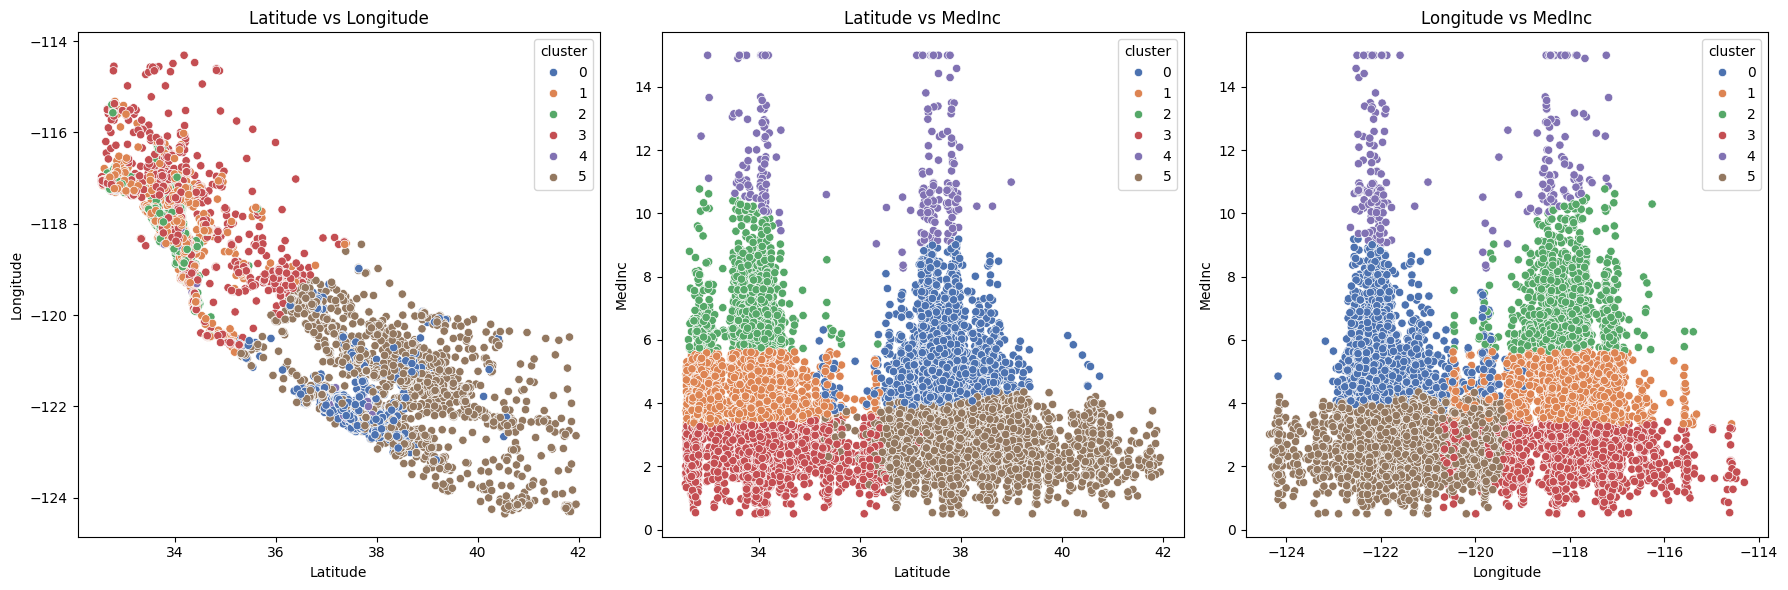

In [11]:
# se logra visualizar los datos separados por cluster 0 - 5 . Los 6 que les definimos 
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de subplots
fig, axis = plt.subplots(1, 3, figsize=(18, 6))

# Lista de combinaciones (x, y) para los gráficos
plot_params = [("Latitude", "Longitude"), ("Latitude", "MedInc"), ("Longitude", "MedInc")]

# Loop para crear cada scatter plot en los subplots
for i, (x, y) in enumerate(plot_params):
    sns.scatterplot(ax=axis[i], data=X_train, x=x, y=y, hue="cluster", palette="deep")
    axis[i].set_title(f"{x} vs {y}")

# Ajustar el layout para que no haya solapamientos
plt.tight_layout()
plt.show()



Una vez que K-Means ha categorizado los datos, podemos entrenar un modelo de clasificación supervisado 

Random Forest

In [13]:
#Entrenamos al modelo
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state = 42)
model_RF.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

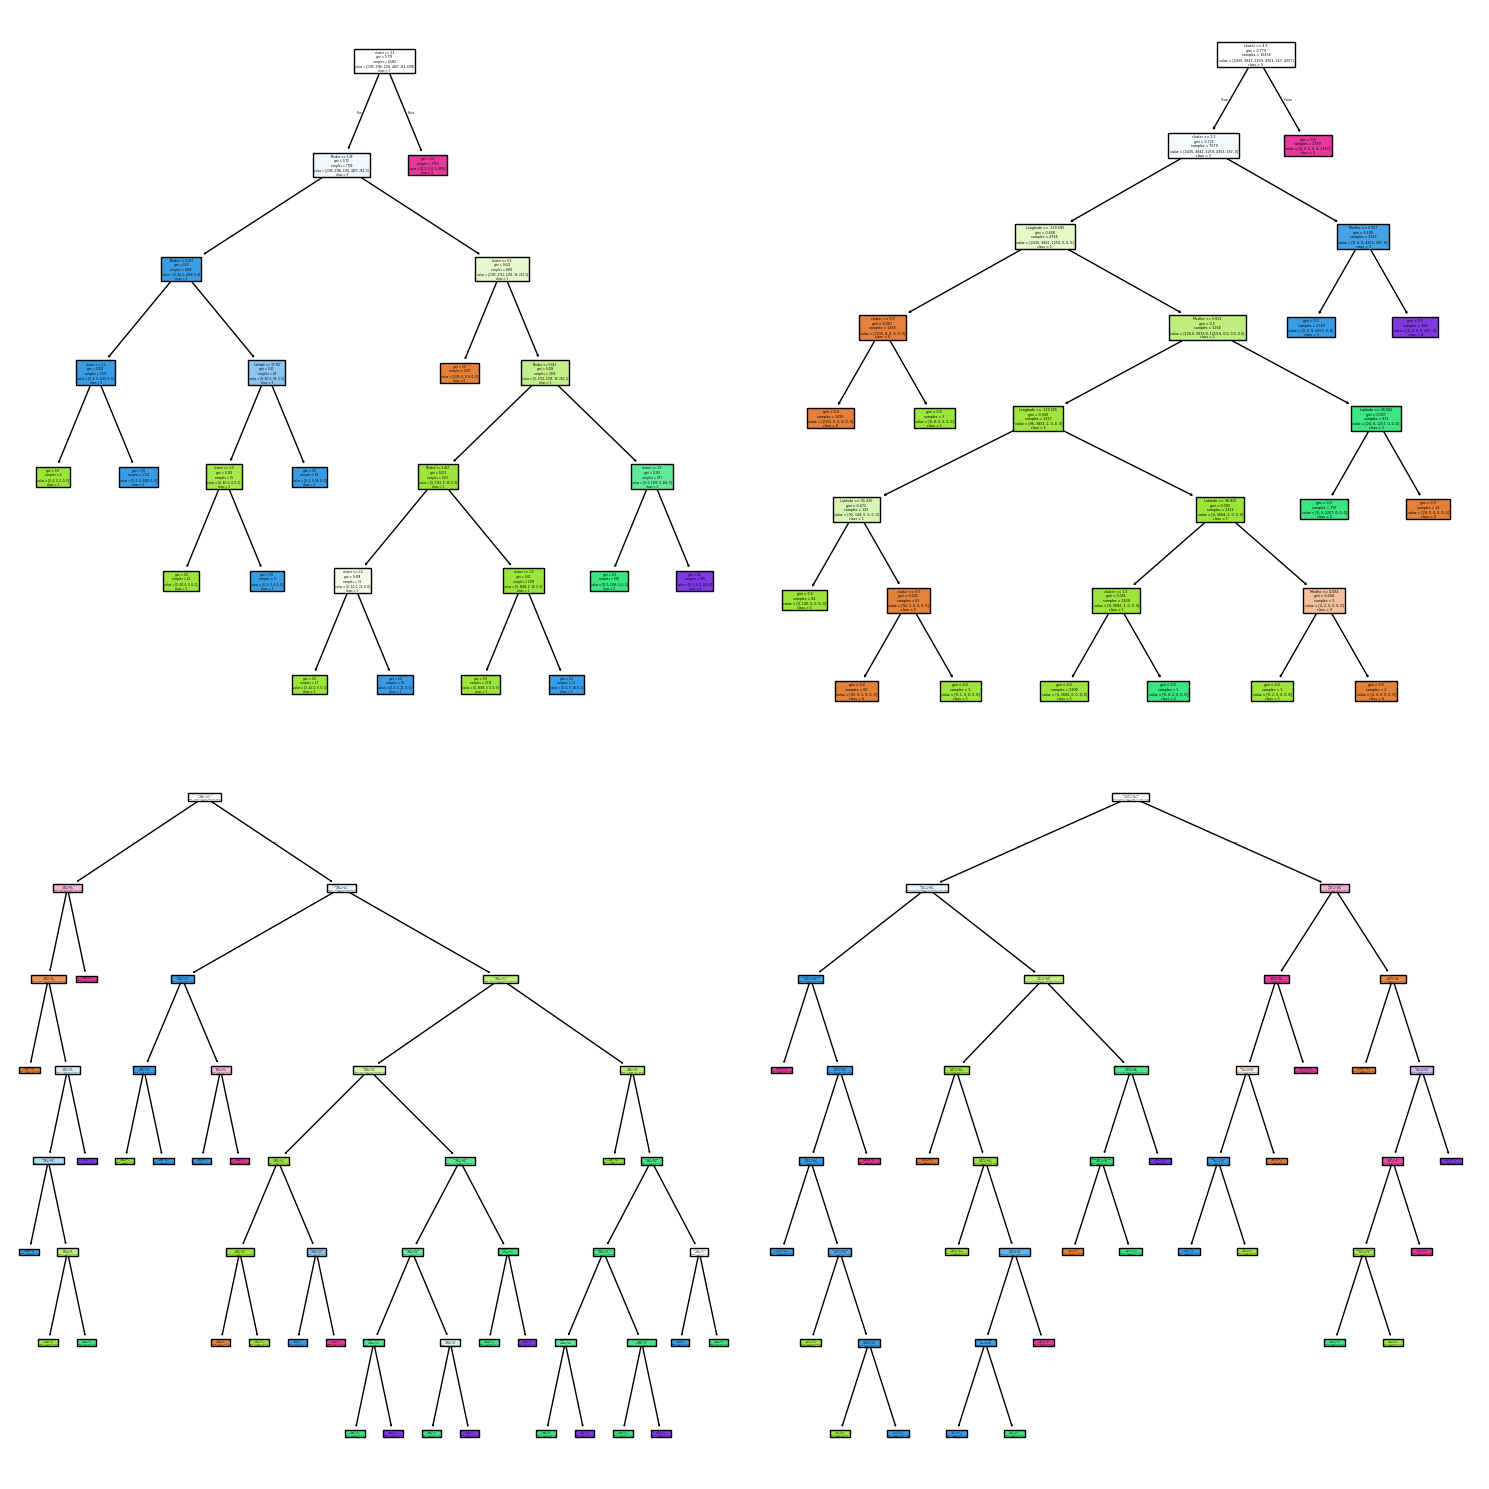

In [14]:
# Se imprime los primeros 4 arboles 
from sklearn import tree
import numpy as np

# Crear la figura y los ejes (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Aplanar la matriz de ejes en una lista unidimensional
axes = np.array(axes).flatten()

# Recorre los primeros 4 árboles del modelo y grafica
for i in range(4):
    tree.plot_tree(model_RF.estimators_[i], ax=axes[i], 
                   feature_names=list(X_train.columns), 
                   class_names=[str(cls) for cls in model_RF.classes_], 
                   filled=True)

# Ajustar el layout para que no haya solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [15]:
y_pred = model_RF.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

# Arroja un accuracy bastante bueno 

1.0

In [18]:
# guardamos los modelos
from pickle import dump

dump(model, open("../models/k-means_default_42.sav", "wb"))
dump(model_RF, open("../models/random_forest_classifier_default_42.sav", "wb"))